In [1]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import seaborn as sb

In [2]:
from scipy.stats import beta, bernoulli, binom

In [3]:
data = [1]*1 + [0] * 6 + [1] * 2 + [0] * 3 + [1] * 1 + [0] * 3 + [1] * 2

In [4]:
data

[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]

In [5]:
thetas=np.linspace(0,1,100)

In [6]:
thetas.min(), thetas.max()

(0.0, 1.0)

In [7]:
cdata = np.cumsum([0] + data)

In [8]:
cdata

array([0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6])

In [9]:
N = len(data)

In [10]:
N = np.sort(np.random.choice(np.arange(1,18), size=6, replace=False))

In [11]:
N = np.concatenate((np.array([0]), N,np.array([18])))

In [12]:
N

array([ 0,  3,  5,  7,  8,  9, 15, 18])

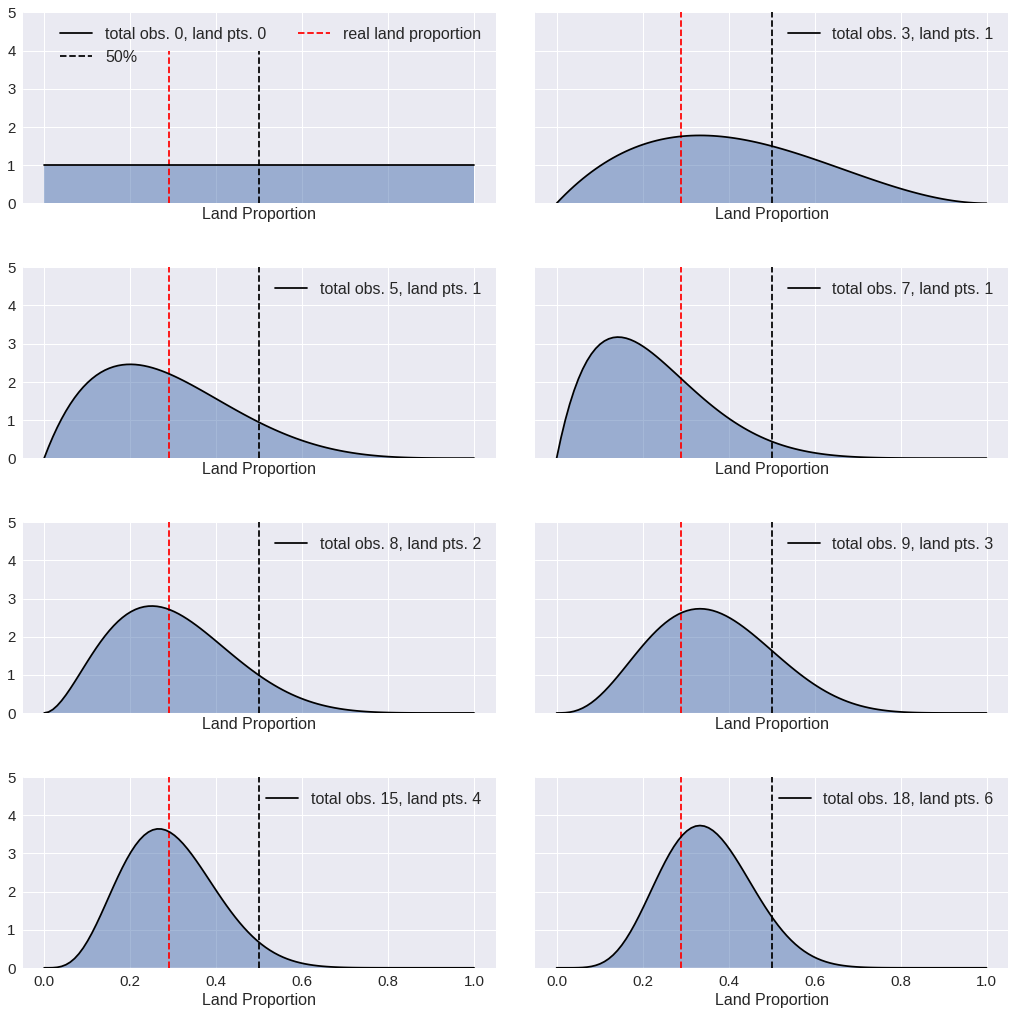

In [15]:
f, axs = pl.subplots(ncols=2, nrows=4, figsize=(15, 15), sharex=True, sharey=True)
sb.set(font_scale=1.5)
for n ,ax in zip(N, axs.ravel()):
    ocns = cdata[n]
    y = beta.pdf(thetas, 1 + ocns, 1 + n - ocns)
    ymax=5
    lbl1=None
    lbl2=None
    if n == 0:
        ymax=4
        lbl1 = '50%'
        lbl2 = 'real land proportion'
    ax.vlines(0.5, 0, ymax, linestyles='--', label=lbl1)
    ax.vlines(0.29, 0, ymax, linestyles='--', color='r', label=lbl2)
    ax.plot(thetas, y, color='k', label='total obs. %d, land pts. %d' %(n, ocns))
    ax.legend(fontsize=16, ncol=2)
    ax.set_ylim(0,5)
    ax.fill_between(thetas,y,alpha=0.5);
    ax.set_xlabel('Land Proportion', fontsize=16)
f.tight_layout(pad=2.2)
#f.suptitle('Inference Starting from a Flat Prior')
f.savefig('./bayesianChl_stuff/landProp_flat.png', dpi=300, format='png')

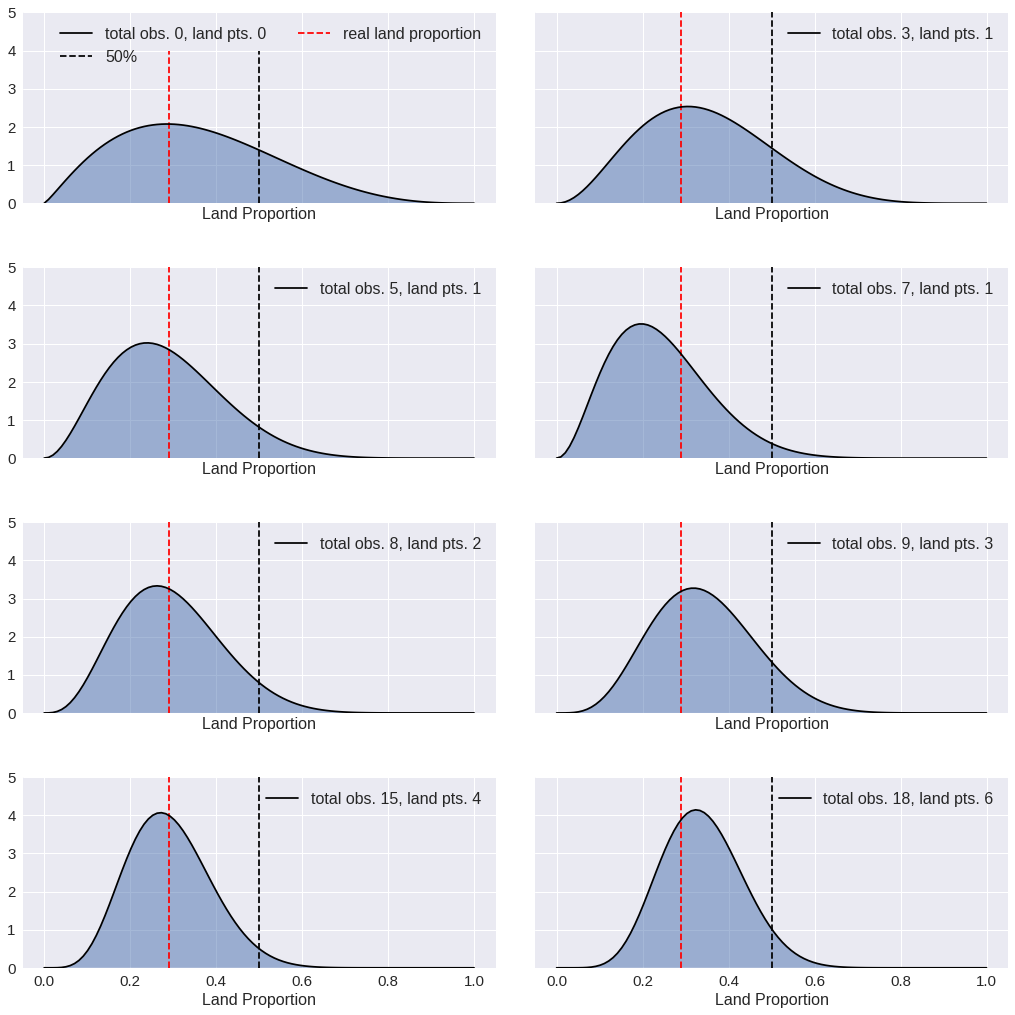

In [14]:
f, axs = pl.subplots(ncols=2, nrows=4, figsize=(15, 15), sharex=True, sharey=True)
sb.set(font_scale=1.5)
for n ,ax in zip(N, axs.ravel()):
    ocns = cdata[n]
    y = beta.pdf(thetas, 2.2 + ocns, 4 + n - ocns)
    ymax=5
    lbl1=None
    lbl2=None
    if n == 0:
        ymax=4
        lbl1 = '50%'
        lbl2 = 'real land proportion'
    ax.vlines(0.5, 0, ymax, linestyles='--', label=lbl1)
    ax.vlines(0.29, 0, ymax, linestyles='--', color='r', label=lbl2)
    ax.plot(thetas, y, color='k', label='total obs. %d, land pts. %d' %(n, ocns))
    ax.legend(fontsize=16, ncol=2)
    ax.set_ylim(0,5)
    ax.fill_between(thetas,y,alpha=0.5);
    ax.set_xlabel('Land Proportion', fontsize=16)
f.tight_layout(pad=2.2)
#f.suptitle('Inference Starting from a Weak Prior')
f.savefig('./bayesianChl_stuff/landProp_weak.png', dpi=300, format='png')